**1.Tujuan**

Visualisasi ini bertujuan untuk ekplorasi data, dimana menunjukkan hubungan,pola, dan informasi yang terdapat pada dataset

**2. User**

> Boardroom Environment


Visualisasi ini dapat di gunakan dalam mempresentasikan hasil eksplorasi data kepada atasan

**3. Fungsi**

 > When Function is to explore

 Visualisasi ini berfungsi untuk membuat alat lanjutan dan memvisualisasikan data yang ada



4. **Tone**



> Pragmatic or analytical portrayal

Visualisasi ini dapat menggambarkan data yang didapat agar data dapat di pelajari lebih lanjut



In [7]:

import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [8]:
df = pd.read_csv("/content/telecom_churn.csv")

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


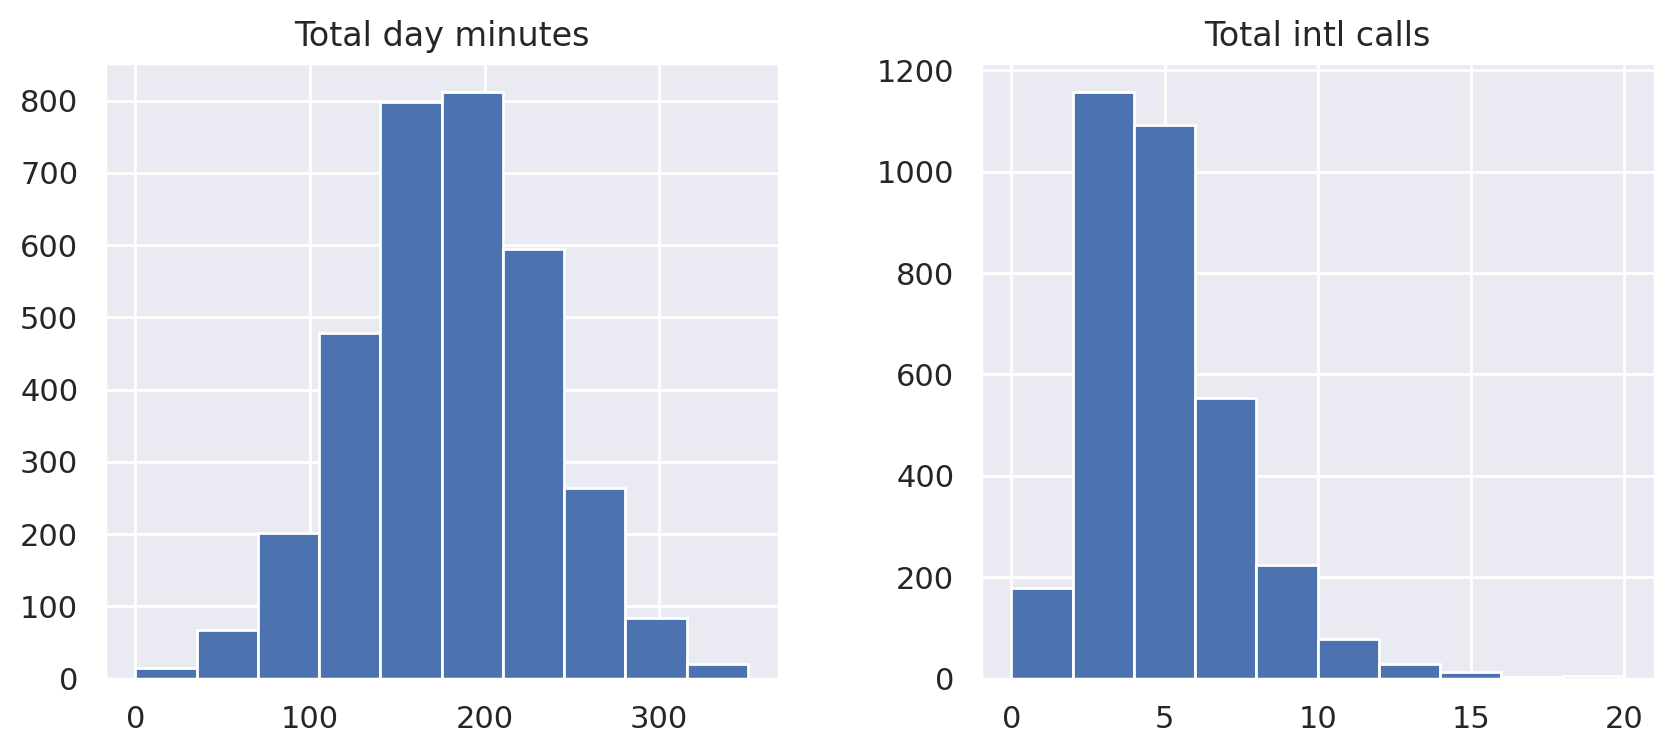

In [10]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

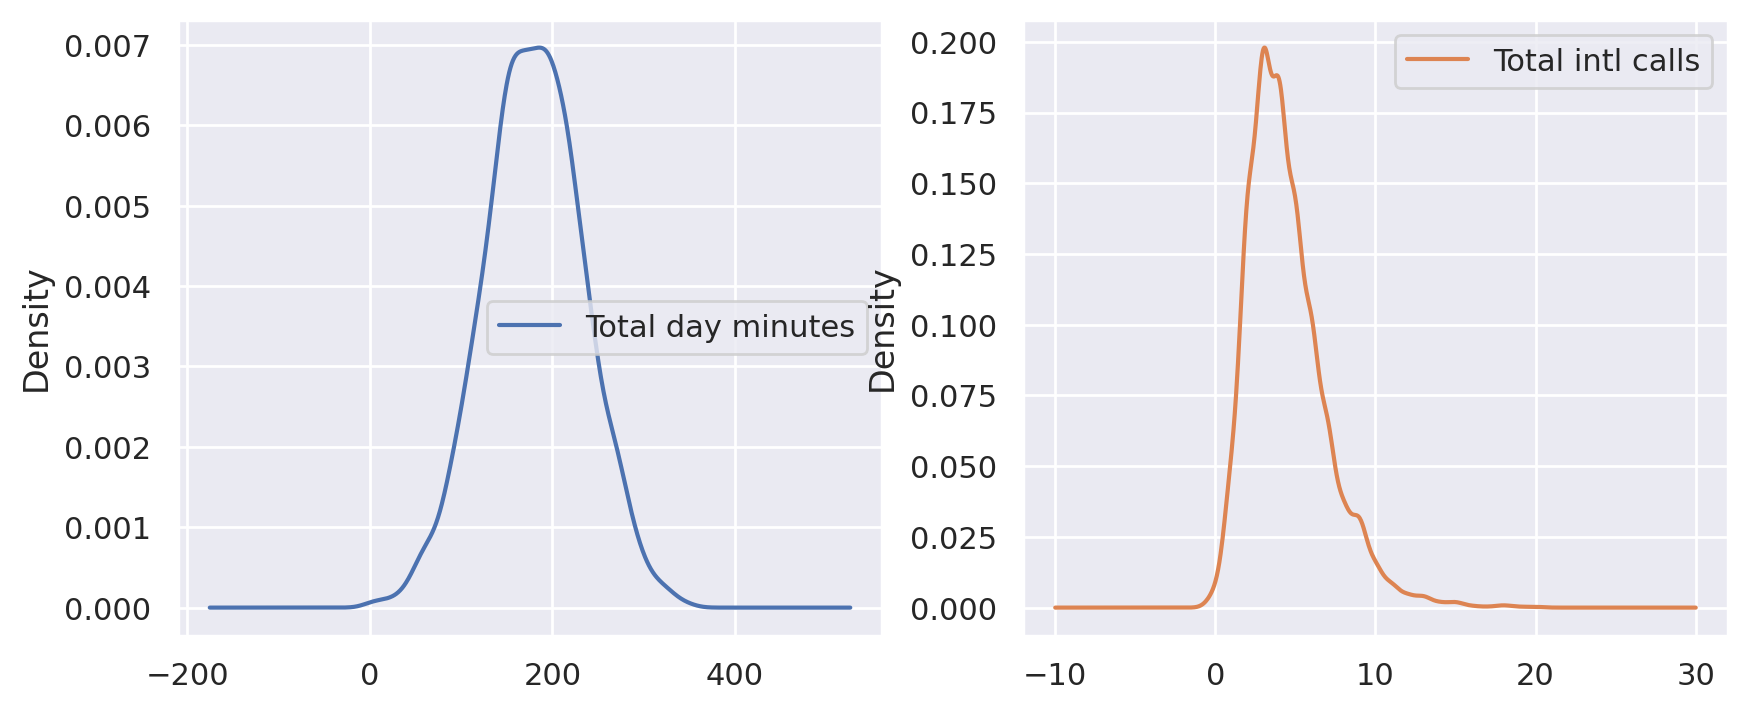

In [11]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

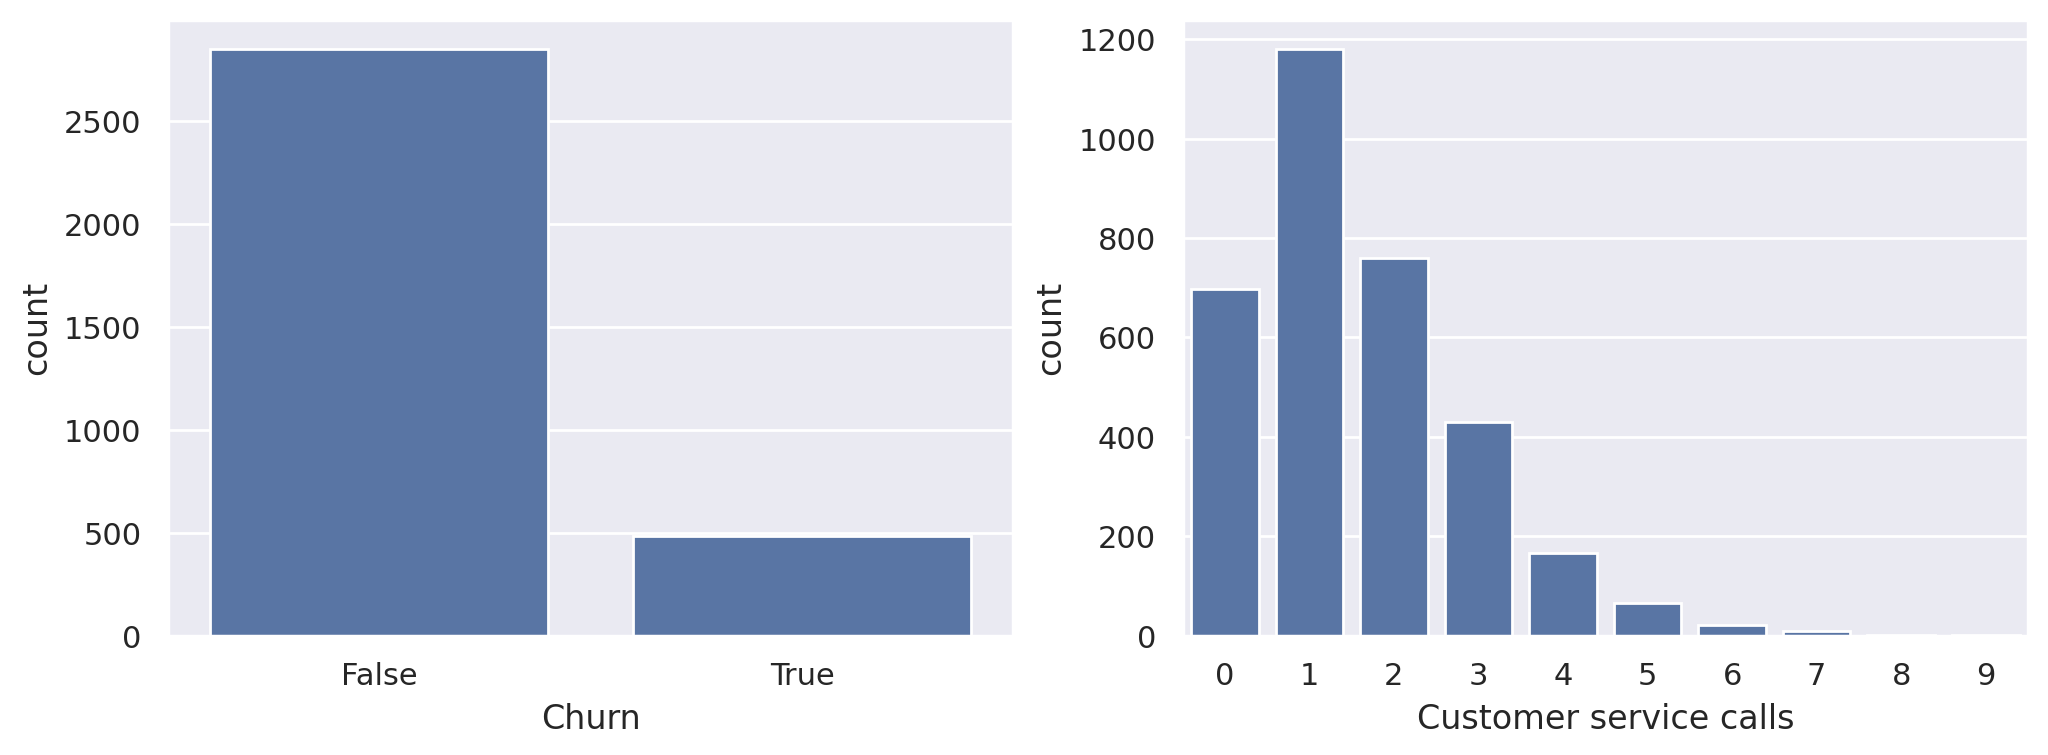

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

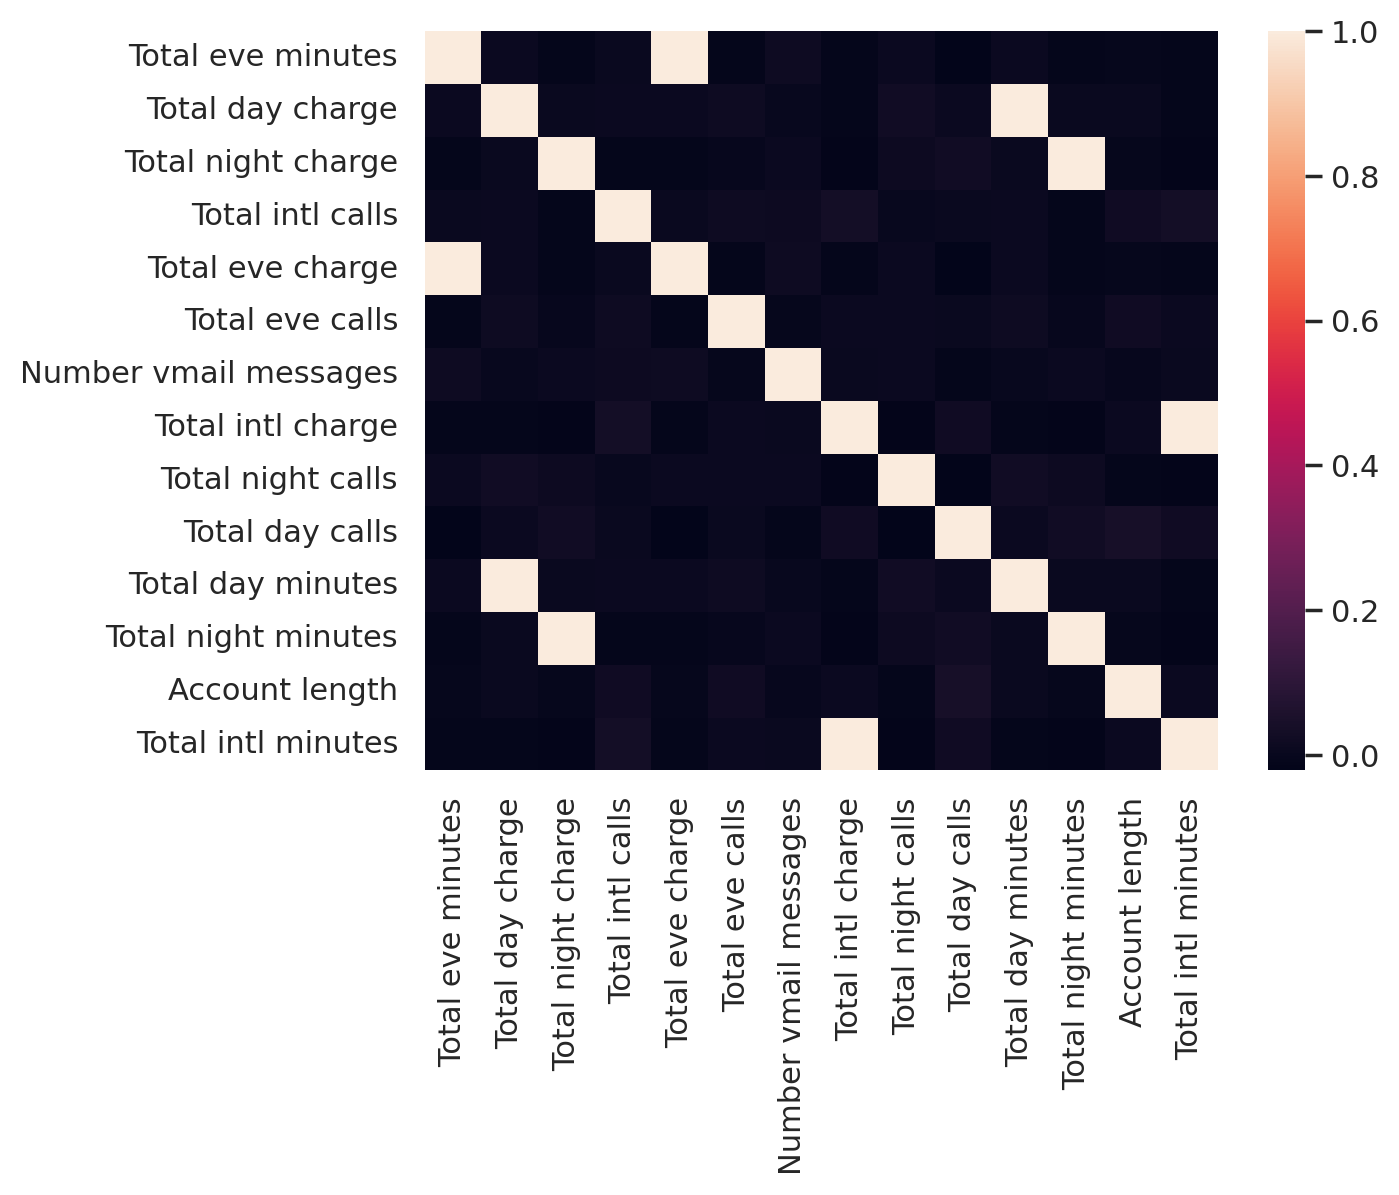

In [22]:
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);


In [23]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)


In [33]:
%config InlineBackend.figure_format = 'retina'

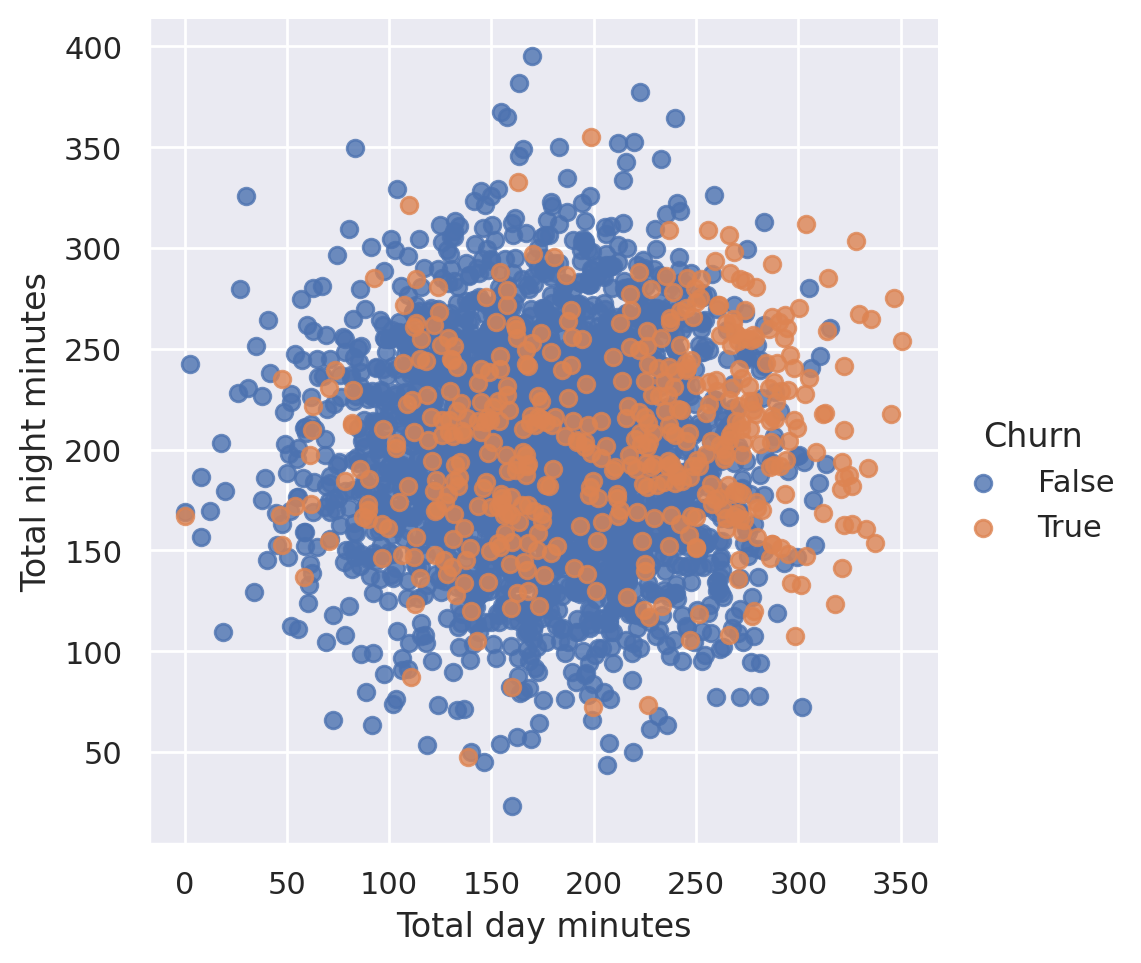

In [36]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False);

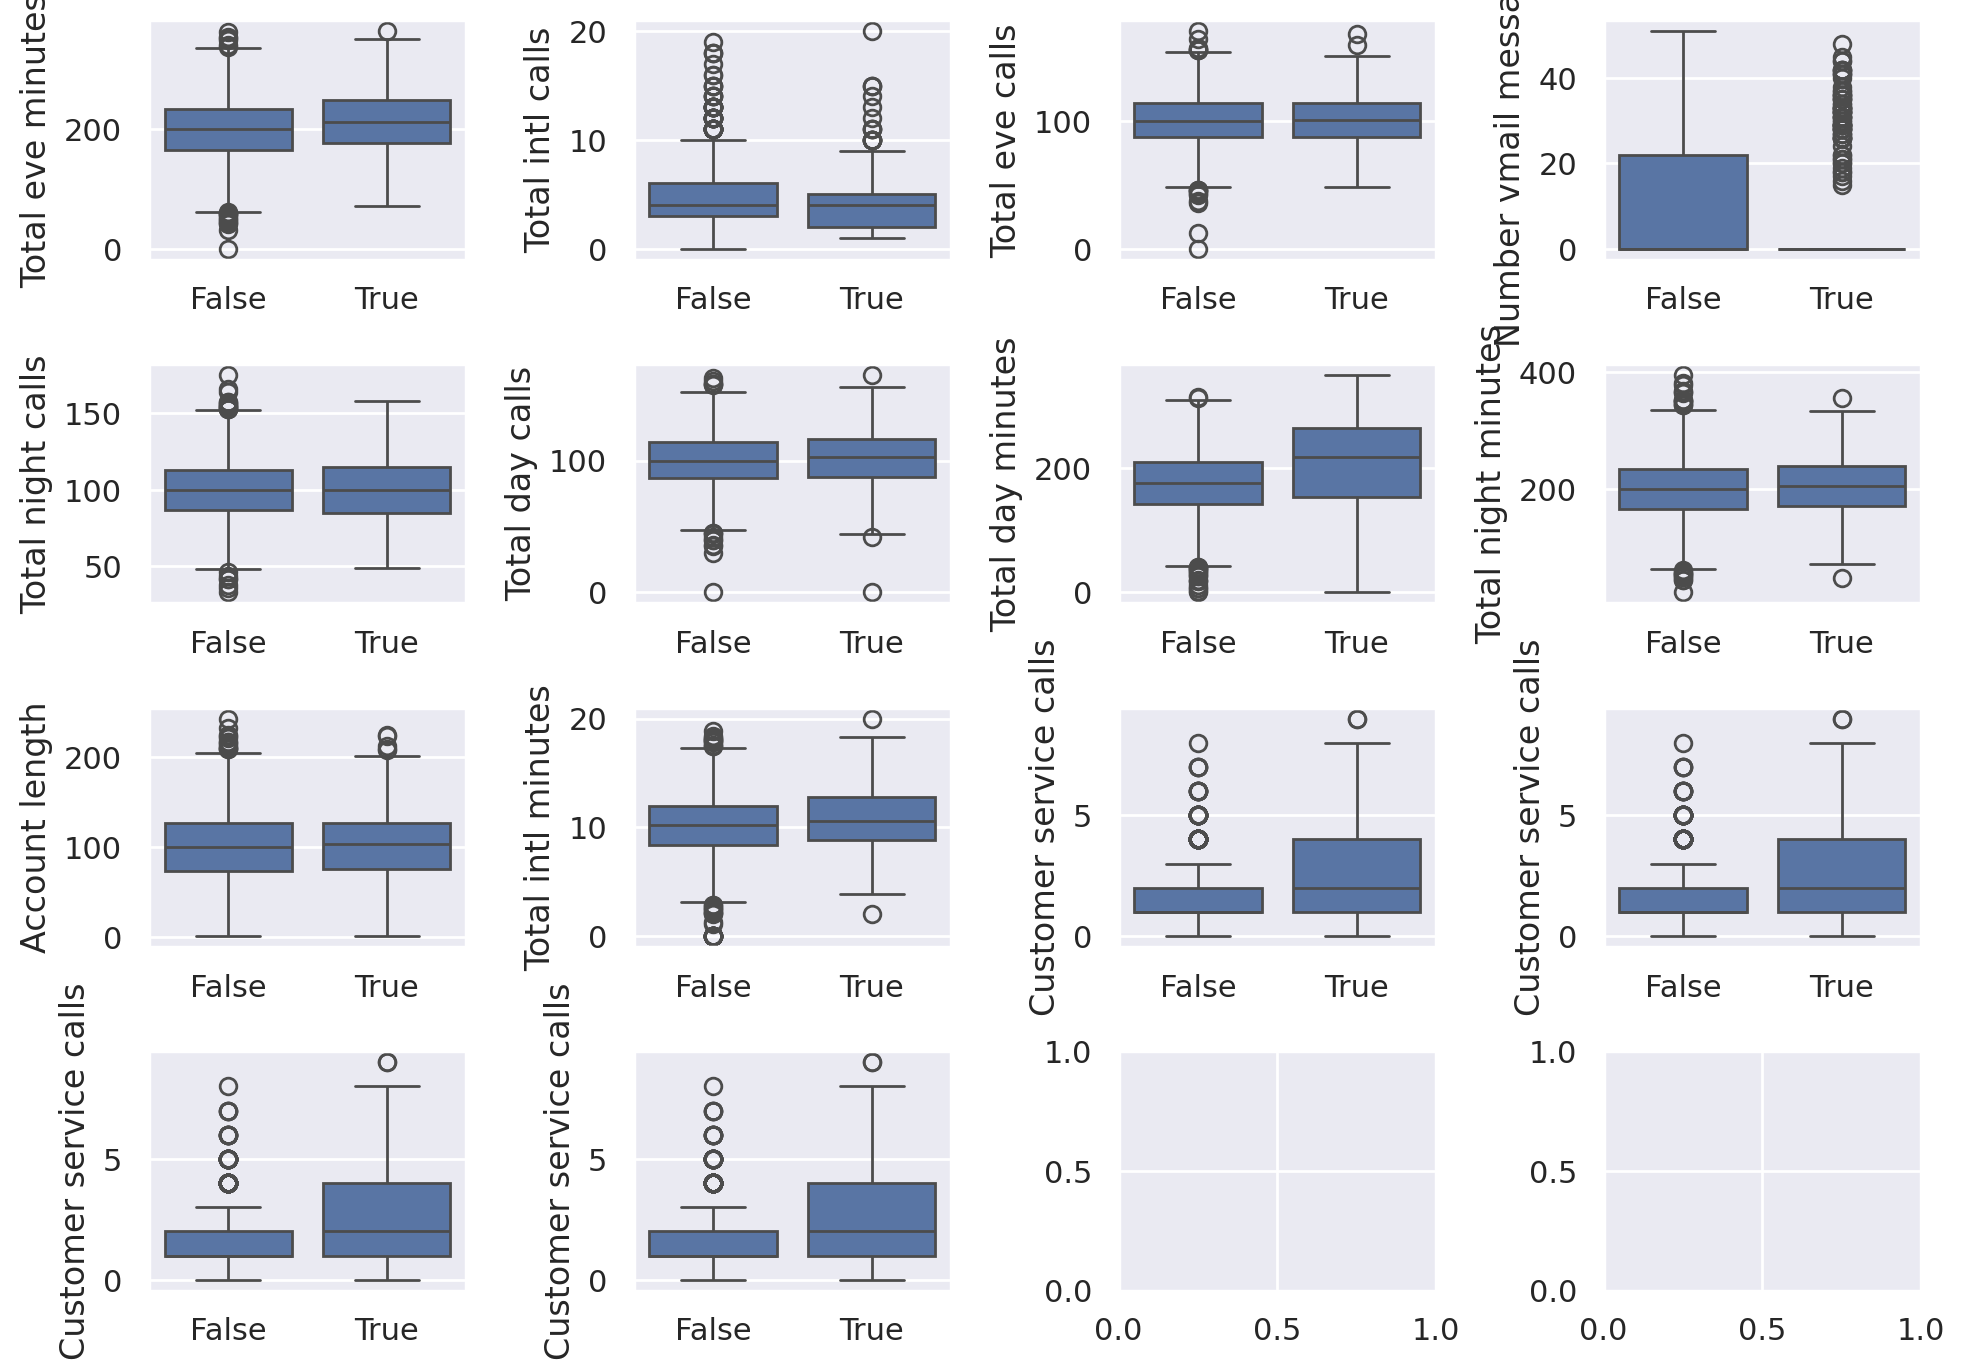

In [38]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 7)) # Changed nrows to 4 to accomodate 13 features
for idx, feat in  enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [27]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [29]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

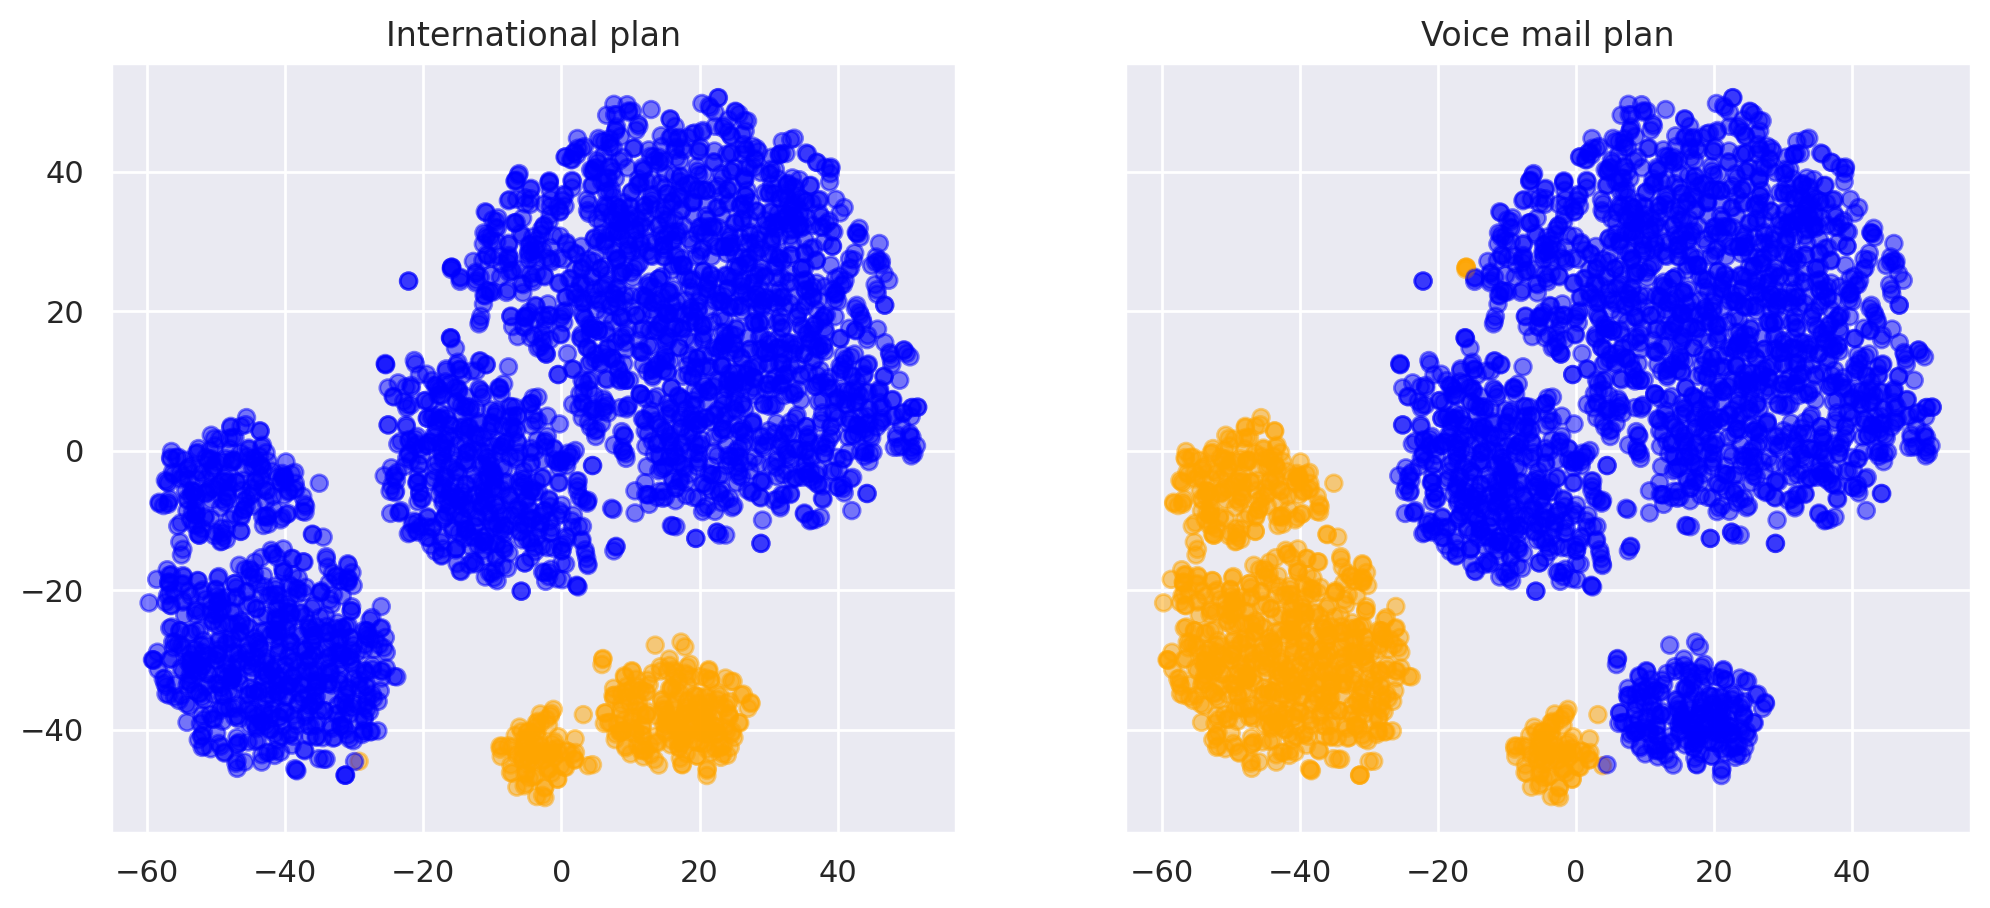

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);